In [ ]:
#!pip install scipy 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Exercise 1

In [8]:
# Generate 1000 samples from standard normal distribution
samples = np.random.normal(loc=0, scale=1, size=1000)

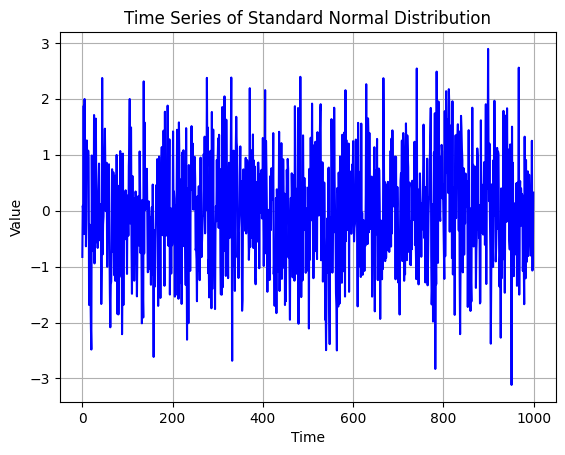

In [5]:
# Create time indices
time_indices = np.arange(1000)

# Plot time series
plt.plot(time_indices, samples, color='blue')
plt.title('Time Series of Standard Normal Distribution')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

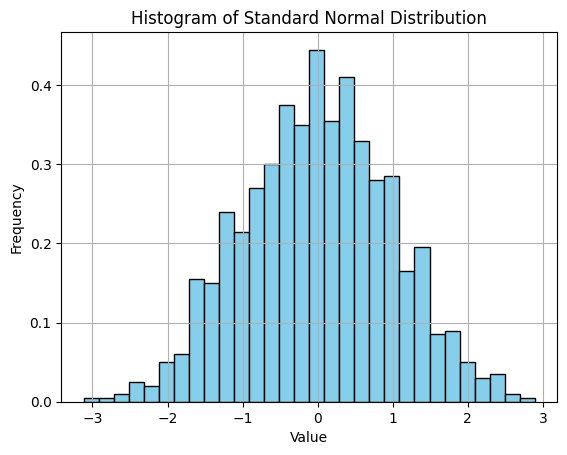

In [6]:
# Plot histogram
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Exercise 2

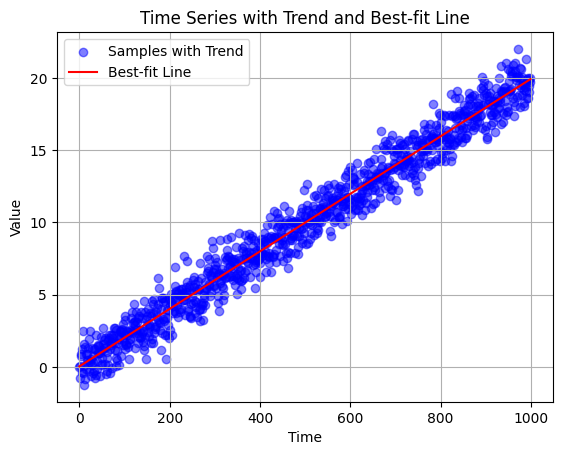

In [13]:
# Adding a linear trend to the samples
trend = 0.02 * time_indices  # Adjust the slope for the trend
samples_with_trend = samples + trend

# Plot scatter plot of the time series with trend
plt.scatter(time_indices, samples_with_trend, color='blue', alpha=0.5, label='Samples with Trend')

# Find and plot the best-fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(time_indices, samples_with_trend)
best_fit_line = slope * time_indices + intercept
plt.plot(time_indices, best_fit_line, color='red', label='Best-fit Line')

plt.title('Time Series with Trend and Best-fit Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 3

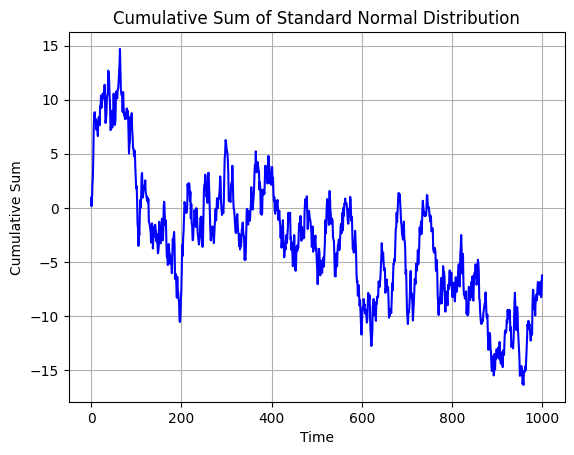

In [16]:
# Apply cumulative sum
cumulative_sum = np.cumsum(samples)

# Plot the cumulative sum
plt.plot(cumulative_sum, color='blue')
plt.title('Cumulative Sum of Standard Normal Distribution')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()


When you apply `np.cumsum()` (cumulative sum) to a series of random noise, it effectively integrates the noise over time, accumulating the values. This process can resemble a random walk.

The resulting plot demonstrates the cumulative effect of adding each value of the random noise sequentially, which resembles a random walk process.

# Exercise 4

/tmp/ipykernel_68738/2306259035.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, covariance_matrix, size=1000)


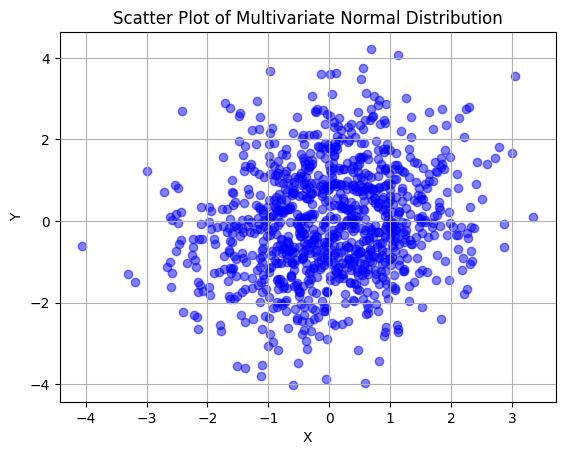

In [19]:
# Mean vector and covariance matrix for multivariate normal distribution
mean = [0, 0]  # mean vector
covariance_matrix = [[1, -0.5], [0.5, 2]]  # covariance matrix

# Generate 1000 samples from multivariate normal distribution
samples = np.random.multivariate_normal(mean, covariance_matrix, size=1000)

# Extract x and y coordinates
x = samples[:, 0]
y = samples[:, 1]

# Plot the samples
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot of Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Exercise 5

In [21]:
# Calculate sample mean
sample_mean = np.mean(samples, axis=0)

# Calculate sample covariance
sample_covariance = np.cov(samples, rowvar=False)

print("Sample Mean:")
print(sample_mean)

print("\nSample Covariance Matrix:")
print(sample_covariance)

Sample Mean:
[ 0.01227202 -0.04530625]

Sample Covariance Matrix:
[[1.19518556 0.26098073]
 [0.26098073 1.92373372]]


In [20]:
# Calculate sample mean
sample_mean = np.sum(samples, axis=0) / len(samples)

# Calculate sample covariance
centered_samples = samples - sample_mean
sample_covariance = np.dot(centered_samples.T, centered_samples) / (len(samples) - 1)

print("Sample Mean:")
print(sample_mean)

print("\nSample Covariance Matrix:")
print(sample_covariance)

Sample Mean:
[ 0.01227202 -0.04530625]

Sample Covariance Matrix:
[[1.19518556 0.26098073]
 [0.26098073 1.92373372]]


# Optional

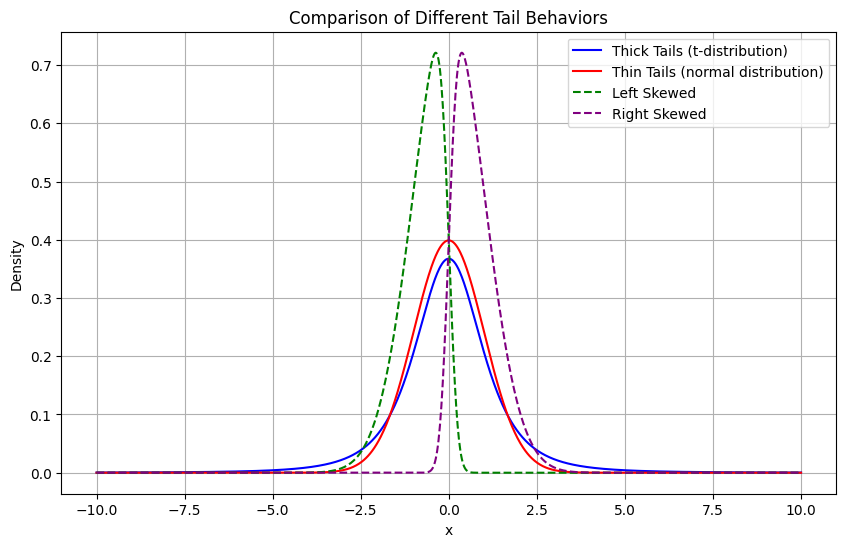

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, skewnorm

# Parameters
df = 3  # degrees of freedom for t-distribution
alpha_left = -5  # left skewness parameter
alpha_right = 5  # right skewness parameter

# Generate data
x = np.linspace(-10, 10, 1000)
t_dist = t.pdf(x, df)
norm_dist = norm.pdf(x)
skew_left_dist = skewnorm.pdf(x, alpha_left)
skew_right_dist = skewnorm.pdf(x, alpha_right)

# Plot distributions
plt.figure(figsize=(10, 6))

# Thick Tails (t-distribution)
plt.plot(x, t_dist, label='Thick Tails (t-distribution)', color='blue')

# Thin Tails (normal distribution)
plt.plot(x, norm_dist, label='Thin Tails (normal distribution)', color='red')

# Left Skewed Distribution
plt.plot(x, skew_left_dist, label='Left Skewed', color='green', linestyle='--')

# Right Skewed Distribution
plt.plot(x, skew_right_dist, label='Right Skewed', color='purple', linestyle='--')

plt.title('Comparison of Different Tail Behaviors')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## QQ Plots

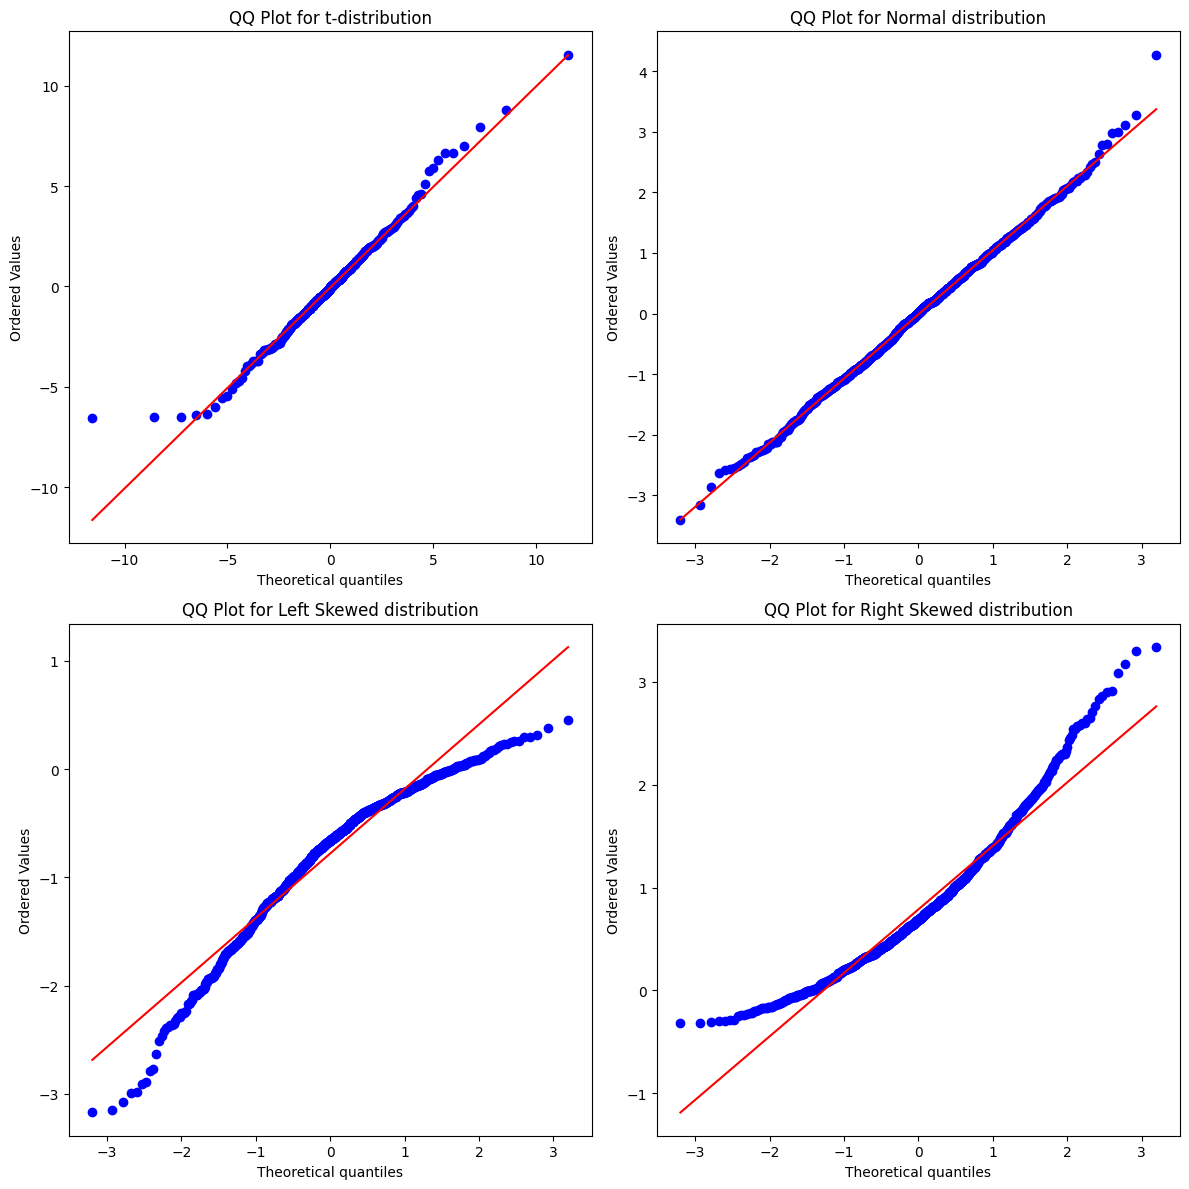

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, skewnorm, probplot

# Parameters
df = 3  # degrees of freedom for t-distribution
alpha_left = -5  # left skewness parameter
alpha_right = 5  # right skewness parameter

# Generate data
x = np.linspace(-10, 10, 1000)
t_dist = t.rvs(df, size=1000)
norm_dist = norm.rvs(size=1000)
skew_left_dist = skewnorm.rvs(alpha_left, size=1000)
skew_right_dist = skewnorm.rvs(alpha_right, size=1000)

# Create QQ plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# QQ plot for t-distribution
probplot(t_dist, dist="t", sparams=(df,), plot=axs[0, 0])
axs[0, 0].set_title('QQ Plot for t-distribution')

# QQ plot for normal distribution
probplot(norm_dist, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot for Normal distribution')

# QQ plot for left skewed distribution
probplot(skew_left_dist, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot for Left Skewed distribution')

# QQ plot for right skewed distribution
probplot(skew_right_dist, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot for Right Skewed distribution')

plt.tight_layout()
plt.show()

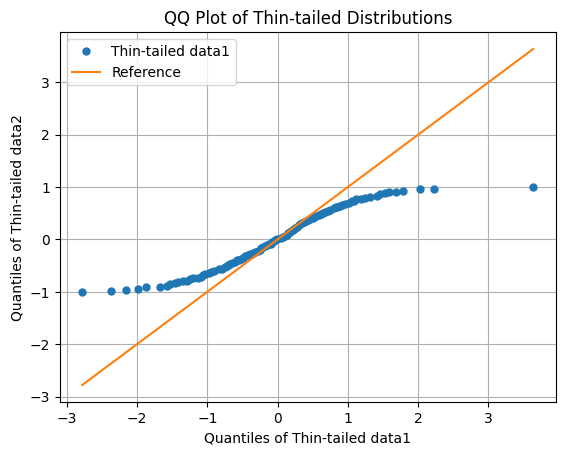

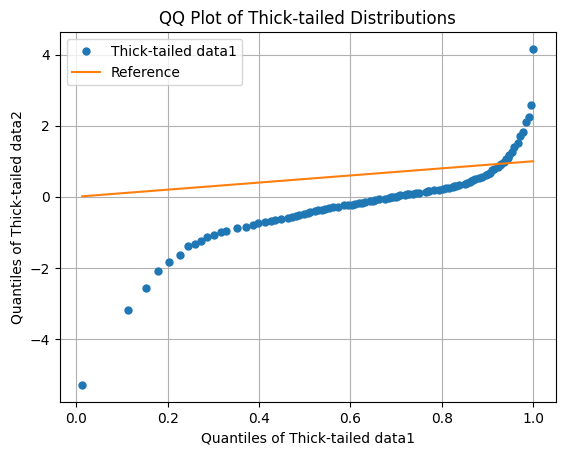

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def qqplot(data1, data2, label1="data1", label2="data2", title="QQ Plot"):
    """
    Generates a QQ plot comparing two datasets.

    Args:
        data1 (list or np.array): The first dataset.
        data2 (list or np.array): The second dataset.
        label1 (str, optional): The label for the first dataset. Defaults to "data1".
        label2 (str, optional): The label for the second dataset. Defaults to "data2".
        title (str, optional): The title of the plot. Defaults to "QQ Plot".
    """

    quantiles1 = np.quantile(data1, np.linspace(0, 1, 100))
    quantiles2 = np.quantile(data2, np.linspace(0, 1, 100))

    quantiles1.sort()
    quantiles2.sort()

    plt.plot(quantiles1, quantiles2, "o", markersize=5, label=label1)
    plt.plot(quantiles1, quantiles1, "-", label="Reference")
    plt.xlabel("Quantiles of " + label1)
    plt.ylabel("Quantiles of " + label2)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


# Simulate data with thin tails
data1_thin = np.random.normal(loc=0, scale=1, size=1000)
data2_thin = np.random.uniform(low=-1, high=1, size=1000)

# Simulate data with thick tails
data1_thick = np.random.power(2, size=1000)
data2_thick = np.random.laplace(loc=0, scale=1 / np.sqrt(2), size=1000)

# Generate QQ plots
qqplot(data1_thin, data2_thin, label1="Thin-tailed data1", label2="Thin-tailed data2", title="QQ Plot of Thin-tailed Distributions")
qqplot(data1_thick, data2_thick, label1="Thick-tailed data1", label2="Thick-tailed data2", title="QQ Plot of Thick-tailed Distributions")

## Random Walk Simulation

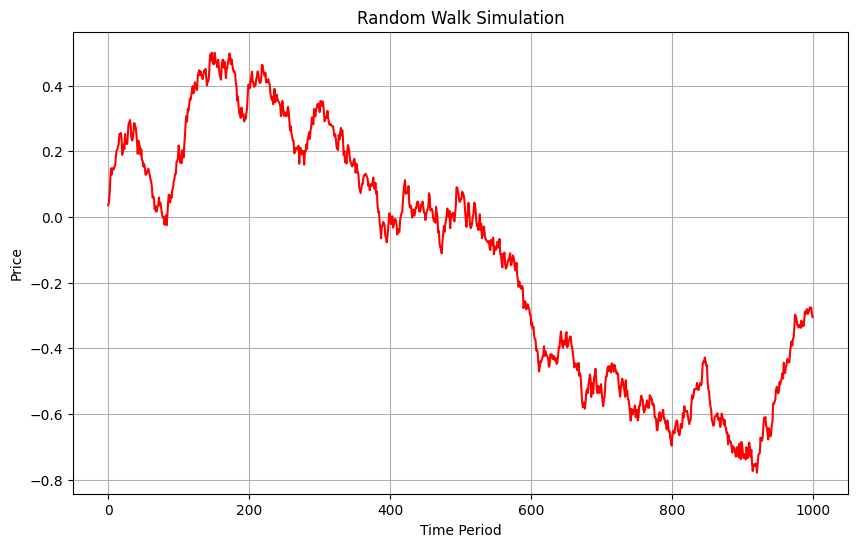

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting parameters
np.random.seed(0)
num_periods = 1000
mean_return = 0.0006
std_dev = 0.02

# Simulating random walk
returns = np.random.normal(mean_return, std_dev, num_periods)
prices = np.cumsum(returns)

# Plotting random walk
plt.figure(figsize=(10, 6))
plt.plot(prices, color='red')
plt.title('Random Walk Simulation')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## Simple Moving Average

In [7]:
import numpy as np

def generate_log_returns(num_days, mu, sigma):
    np.random.seed(0)
    return np.random.normal(mu, sigma, num_days)

def simple_moving_average(data, window_size):
    sma = np.convolve(data, np.ones(window_size), 'valid') / window_size
    return sma

# Parameters
num_days = 100
mu = 0.001  # mean of the log returns
sigma = 0.02  # standard deviation of the log returns
window_size = 10  # size of the moving average window

# Generate log returns
log_returns = generate_log_returns(num_days, mu, sigma)

# Calculate Simple Moving Average
sma = simple_moving_average(log_returns, window_size)

print("Log Returns:")
print(log_returns)
print("\nSimple Moving Average with window size", window_size, ":")
print(sma)


Log Returns:
[ 0.03628105  0.00900314  0.02057476  0.04581786  0.03835116 -0.01854556
  0.02000177 -0.00202714 -0.00106438  0.00921197  0.00388087  0.03008547
  0.01622075  0.0034335   0.00987726  0.00767349  0.03088158 -0.00310317
  0.00726135 -0.01608191 -0.0500598   0.01407237  0.01828872 -0.0138433
  0.04639509 -0.02808731  0.00191517 -0.00274368  0.03165558  0.03038718
  0.00409895  0.00856325 -0.01675571 -0.03861593 -0.00595824  0.00412698
  0.02560581  0.0250476  -0.00674654 -0.00504606 -0.01997106 -0.02740036
 -0.0331254   0.04001551 -0.00919304 -0.00776149 -0.02405591  0.01654981
 -0.03127796 -0.00325481 -0.01690933  0.00873805 -0.0092161  -0.02261264
  0.00043636  0.00956664  0.00233034  0.00704944 -0.01168644 -0.00625482
 -0.01244921 -0.00619106 -0.01526293 -0.03352565  0.00454852 -0.00703562
 -0.03160397  0.01025565 -0.01714597  0.00203891  0.01558181  0.00357966
  0.02378801 -0.02369652  0.00904683 -0.0126962  -0.01641594 -0.01057699
 -0.00523105  0.00212331 -0.022303    0

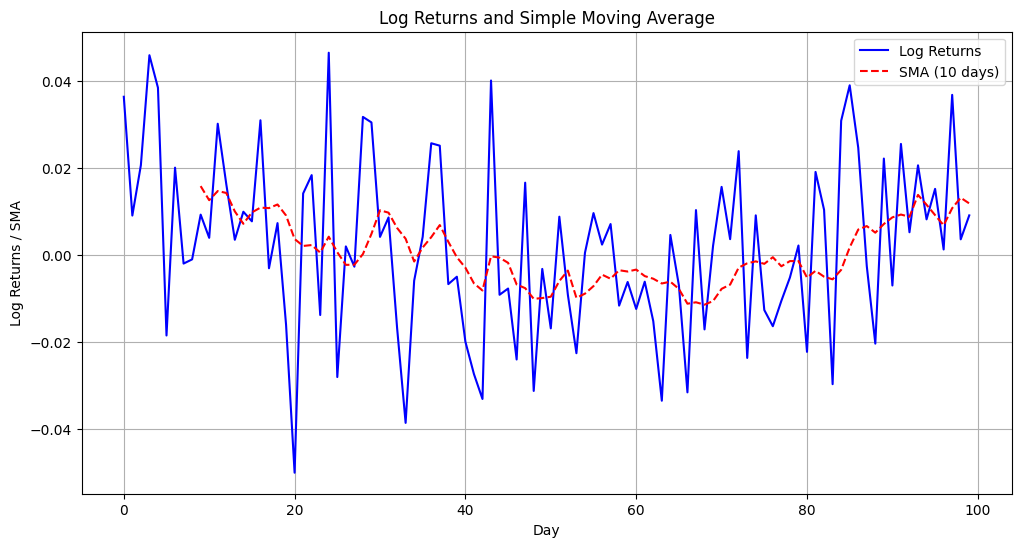

In [8]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(log_returns, label='Log Returns', color='blue')
plt.plot(range(window_size - 1, num_days), sma, label=f'SMA ({window_size} days)', color='red', linestyle='--')
plt.title('Log Returns and Simple Moving Average')
plt.xlabel('Day')
plt.ylabel('Log Returns / SMA')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
def my_convolve(x, h):
    # Length of input signals
    M = len(x)
    N = len(h)
    
    # Length of the output signal
    L = M + N - 1
    
    # Initialize the result array
    y = [0] * L
    
    # Convolution operation
    for n in range(L):
        for k in range(max(0, n - M + 1), min(n + 1, N)):
            print(f'n: {n}, k: {k} ')
            y[n] += x[n - k] * h[k]
            print(y[n])
    
    return y

# Define two input signals
x = [1, 2, 3, 4]
h = [0.5, 0.5]

# x = np.arange(1, 21)
# h = np.ones(3)

# Perform custom convolution
y_custom = my_convolve(x, h) 

print("Result of custom convolution:", y_custom)


n: 0, k: 0 
0.5
n: 1, k: 0 
1.0
n: 1, k: 1 
1.5
n: 2, k: 0 
1.5
n: 2, k: 1 
2.5
n: 3, k: 0 
2.0
n: 3, k: 1 
3.5
n: 4, k: 1 
2.0
Result of custom convolution: [0.5, 1.5, 2.5, 3.5, 2.0]
